# Chapter 16:Training neural networks


In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 0.1 Classifying data with neural networks

# 16.1 Classifying images of handwritten digits

## 16.1.1 Building the 64-dimensional image vectors

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

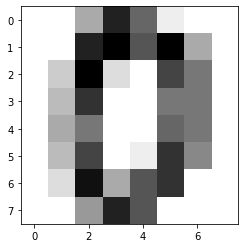

In [4]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

FYI, a way to overlay numbers on the pixels showing their brightness values

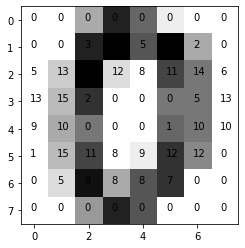

In [5]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
for i in range(0,8):
    for j in range(0,8):
        plt.gca().text(i-0.15,j,int(digits.images[0][i][j]))

In [6]:
np.matrix.flatten(digits.images[0])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
np.matrix.flatten(digits.images[0]) / 15

array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
       0.        , 0.        , 0.2       , 1.        , 0.13333333,
       0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
       0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
       0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
       0.        , 0.        , 0.6       , 0.53333333, 0.        ,
       0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
       0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
       0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.86666667,
       0.66666667, 0.        , 0.        , 0.        ])

## 16.1.2 Building a random digit classifier

In [8]:
def random_classifier(input_vector):
    return np.random.rand(10)

In [9]:
v = np.matrix.flatten(digits.images[0]) / 15.
result = random_classifier(v)
result

array([0.31377263, 0.96330167, 0.57449255, 0.37988077, 0.4331851 ,
       0.26349627, 0.34494497, 0.87132876, 0.51250317, 0.96554722])

**NOTE** because this is random, you will get a different digit result when you re-run the code.

In [10]:
list(result).index(max(result))

9

In [11]:
digits.target[0]

0

## 16.1.3 Measuring performance of the digit classifier

In [12]:
def test_digit_classify(classifier,test_count=1000):
    correct = 0 #<1>
    for img, target in zip(digits.images[:test_count], digits.target[:test_count]): #<2>
        v = np.matrix.flatten(img) / 15. #<3>
        output = classifier(v) #<4>
        answer = list(output).index(max(output)) #<5>
        if answer == target:
            correct += 1 #<6>
    return (correct/test_count) #<7>

In [13]:
test_digit_classify(random_classifier)

0.081

## 16.1.4 Exercises

**Exercise:** Suppose a digit classifier function outputs the following NumPy array.  What digit does it think the image represents?

In [14]:
np.array([5.00512567e-06, 3.94168539e-05, 5.57124430e-09, 9.31981207e-09,
       9.98060276e-01, 9.10328786e-07, 1.56262695e-03, 1.82976466e-04,
       1.48519455e-04, 2.54354113e-07])

array([5.00512567e-06, 3.94168539e-05, 5.57124430e-09, 9.31981207e-09,
       9.98060276e-01, 9.10328786e-07, 1.56262695e-03, 1.82976466e-04,
       1.48519455e-04, 2.54354113e-07])

**Mini project:** Find the average of all the images of nines in the data set, in the same way we took averages of images in Chapter 6.  Plot the resulting image. What does it look like?

In [15]:
def average_img(i):
    imgs = [img for img,target in zip(digits.images[1000:], digits.target[1000:]) if target==i]
    return sum(imgs) / len(imgs)

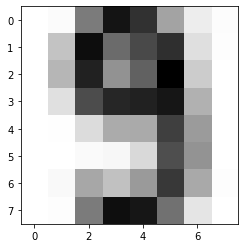

In [16]:
plt.imshow(average_img(9), cmap=plt.cm.gray_r)

**Mini project:** Build a better classifier than a random one by finding the average image of each kind of digit in the test data set, and comparing a target image with all of the averages.  Specifically, return a vector of the dot products of the target image with each average digit image.


In [17]:
avg_digits = [np.matrix.flatten(average_img(i)) for i in range(10)]
def compare_to_avg(v):
    return [np.dot(v,avg_digits[i]) for i in range(10)]

In [18]:
test_digit_classify(compare_to_avg)

0.853

# 16.2 Designing a neural network

## 16.2.1 Organizing neurons and connections

## 16.2.2 Data flow through a neural network

## 16.2.3 Calculating activations

## 16.2.4 Calculating activations in matrix notation

## 16.2.5 Exercises

# 16.3 Building a neural network in Python

## 16.3.1 Implementing an MLP class in Python

In [19]:
class MLP():
    def __init__(self,layer_sizes): #<1>
        self.layer_sizes = layer_sizes
        self.weights = [
            np.random.rand(n,m) #<2>
            for m,n in zip(layer_sizes[:-1],layer_sizes[1:]) #<3>
        ]
        self.biases = [np.random.rand(n) for n in layer_sizes[1:]] #<4>

In [20]:
nn = MLP([2,3])

**NOTE** these numbers are randomly initialized, so your results below will vary.

In [21]:
nn.weights

[array([[0.95458347, 0.89606689],
        [0.15577454, 0.55231836],
        [0.63828923, 0.96462995]])]

In [22]:
nn.biases

[array([0.49820219, 0.07659866, 0.18657956])]

## 16.3.2 Evaluating the MLP

In [23]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

In [24]:
class MLP():
    def __init__(self,layer_sizes): #<1>
        self.layer_sizes = layer_sizes
        self.weights = [
            np.random.rand(n,m) #<2>
            for m,n in zip(layer_sizes[:-1],layer_sizes[1:]) #<3>
        ]
        self.biases = [np.random.rand(n) for n in layer_sizes[1:]] #<4>
    def feedforward(self,v):
        activations = [] #<1>
        a = v
        activations.append(a) #<2>
        for w,b in zip(self.weights, self.biases): #<3>
            z = w @ a + b #<4>
            a = [sigmoid(x) for x in z] #<5>
            activations.append(a) #<6>
        return activations
    def evaluate(self,v):
        return np.array(self.feedforward(v)[-1])

## 16.3.3 Testing the classification performance of an MLP

In [25]:
nn = MLP([64,16,10])

In [26]:
v = np.matrix.flatten(digits.images[0]) / 15.

In [27]:
nn.evaluate(v)

array([0.99973062, 0.99996575, 0.99966987, 0.99980912, 0.99984324,
       0.99954212, 0.99944234, 0.99994448, 0.9999501 , 0.9969294 ])

In [28]:
test_digit_classify(nn.evaluate)

0.102

## 16.3.4 Exercises

# 16.4 Training a neural network using gradient descent

## 16.4.1 Framing training as a minimization problem

## 16.4.2 Calculating gradients with backpropagation

## 16.4.3 Automatic training with scikit-learn

In [29]:
x = np.array([np.matrix.flatten(img) for img in digits.images[:1000]]) / 15.0
y = digits.target[:1000]

In [30]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(16,), #<1>
                    activation='logistic', #<2>
                    max_iter=100, #<3>
                    verbose=10, #<4>
                    random_state=1, #<5>
                    learning_rate_init=.1) #<6>

In [31]:
mlp.fit(x,y)

Iteration 1, loss = 2.21958598
Iteration 2, loss = 1.56912978
Iteration 3, loss = 0.98970277
Iteration 4, loss = 0.57473464
Iteration 5, loss = 0.34048448
Iteration 6, loss = 0.21495855
Iteration 7, loss = 0.14366771
Iteration 8, loss = 0.11077020
Iteration 9, loss = 0.08764273
Iteration 10, loss = 0.07193546
Iteration 11, loss = 0.06020348
Iteration 12, loss = 0.04961899
Iteration 13, loss = 0.03979645
Iteration 14, loss = 0.03334502
Iteration 15, loss = 0.02996006
Iteration 16, loss = 0.02603968
Iteration 17, loss = 0.02355514
Iteration 18, loss = 0.02137348
Iteration 19, loss = 0.01967878
Iteration 20, loss = 0.01751214
Iteration 21, loss = 0.01617330
Iteration 22, loss = 0.01460386
Iteration 23, loss = 0.01408517
Iteration 24, loss = 0.01270504
Iteration 25, loss = 0.01191634
Iteration 26, loss = 0.01114222
Iteration 27, loss = 0.01045989
Iteration 28, loss = 0.00983648
Iteration 29, loss = 0.00920912
Iteration 30, loss = 0.00890851
Iteration 31, loss = 0.00843426
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [32]:
mlp._predict(x)[0]

array([9.99809644e-01, 4.98753964e-11, 2.92965424e-06, 1.13759373e-07,
       1.65244724e-06, 2.78040785e-05, 5.37796139e-06, 9.19004720e-05,
       8.28762196e-08, 6.04946691e-05])

In [33]:
def sklearn_trained_classify(v):
    return mlp._predict([v])[0]

In [34]:
test_digit_classify(sklearn_trained_classify)

1.0

## 16.4.4 Exercises

**Exercise:** Modify the `test_digit_classify` function to work on a custom range of examples in the test set.  How does it do on the next 500 examples after the 1,000 training examples?

In [35]:
def test_digit_classify(classifier,start=0,test_count=1000):
    correct = 0
    end = start + test_count #<1>
    for img, target in zip(digits.images[start:end], digits.target[start:end]): #<2>
        v = np.matrix.flatten(img) / 15.
        output = classifier(v)
        answer = list(output).index(max(output))
        if answer == target:
            correct += 1
    return (correct/test_count) 

In [36]:
test_digit_classify(sklearn_trained_classify,start=1000,test_count=500)

0.962

**Exercise:** Using the squared distance cost function, what is the cost of your randomly-generated MLP for the first 1,000 training examples?  What is the cost of the scikit-learn MLP?

In [37]:
def y_vec(digit):
    return np.array([1 if i == digit else 0 for i in range(0,10)])

In [38]:
def cost_one(classifier,x,i):
    return sum([(classifier(x)[j] - y_vec(i)[j])**2 for j in range(10)])

In [39]:
def total_cost(classifier):
    return sum([cost_one(classifier,x[j],y[j]) for j in range(1000)])/1000.

In [40]:
total_cost(nn.evaluate)

8.990693825613318

In [41]:
total_cost(sklearn_trained_classify)

3.7583389750662126e-05

**Mini-project:** Extract the MLPClassifier weights and biases using its properties called `coefs_` and `intercepts_`, respectively.  Plug these weights and biases into the MLP class we built from scratch and show that your resulting MLP performs well on digit classification.

In [42]:
nn = MLP([64,16,10])

In [43]:
nn.weights = [w.T for w in mlp.coefs_]

In [44]:
nn.biases = mlp.intercepts_

In [45]:
test_digit_classify(nn.evaluate,start=1000,test_count=500)

0.962

# 16.5 Calculating gradients with backpropagation

## 16.5.1 Finding the cost in terms of the last layer weights

## 16.5.1 Finding the cost in terms of the last layer weights

## 16.5.2 Calculating the partial derivatives for the last layer weights using the chain rule

## 16.5.3 Exercises 

**Mini-project:** Use SymPy or your own code from chapter 10 to automatically find the derivative of the sigmoid function:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

Show that the answer you get is equal to $\sigma(x)(1-\sigma(x))$.

In [46]:
from sympy import *
X = symbols('x')
diff(1 / (1+exp(-X)),X)

exp(-x)/(1 + exp(-x))**2